1\. Write a function that converts number representation (bin<->dec<->hex)

In [34]:
# a is the input number given as a string
# b is the base to which you wanat to convert the input number a
def convert_num(a, b):
    hex_base = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    result = 0;
    if len(a)<2: # Decimal
        result = int(a)
    elif a[1] == 'x': # Hexadecimal
        for x in range(2,len(a)):
            result = result + hex_base.index(a[x].upper())*(16**(len(a)-x-1))
    elif a[1] == 'b': # Binary
        for x in range(2,len(a)):
            result = result + int(a[x])*(2**(len(a)-x-1))
    else: # Decimal
        result = int(a)
    # Convert the result to the desired bases
    listR = []
    finalRes = ""
    if (b == 'bin'):
        while result > 0:
            finalRes = str(result%2) + finalRes
            result = result//2
        finalRes = "0b" + finalRes
    elif (b == 'hex'):
        while result > 0:
            finalRes = hex_base[result%16] + finalRes
            result = result//16
        finalRes = "0x" + finalRes
    elif (b == 'dec'):
        finalRes = str(result)
    else:
        finalRes = "Error: Incorrect Base"
    return finalRes

x = '199'
print(convert_num(x, 'hex'))

0xC7


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [35]:
def get_float32(value):
    mantissa_mask = 0x007FFFFF
    mantissa_one = 0x00000001
    exponent_mask = 0x7F800000
    myNum = value & 0xFFFFFFFF
    sign_bit = myNum >> 31
    exponent_bit = (myNum & exponent_mask) >> 23
    mantissa_bit = myNum & mantissa_mask
    result = 1
    for i in range(23):
        result = result + ((mantissa_bit >> (22-i)) & mantissa_one)*2**(-i-1)
    bias = 127
    result = result*2**(exponent_bit-bias)
    if sign_bit > 0:
        result = result*-1
    return result

x = 0xc8c28809
print(get_float32(x))

-398400.28125


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [44]:
under, over = 1.0, 1.0
prev = under
while under/2 > 0:
    under = under/2
print(under)
while over*2 < float('inf'):
    over = over*2
print(over)

5e-324
8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [64]:
value = 2.0
i = 0
while value != 1.0:
    value = 1.0 + 10**(-i)
    i = i + 1
i = i - 2
print("Precision:", 10**(-i))

Precision: 1e-15


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [29]:
# a
def quadratic_sol_1(a, b, c):
    # NUM: discordant sign (- and +)
    x1 = (-b + (b**2 - 4*a*c)**(1/2))/(2*a) 
    # NUM: same sign (both -)
    x2 = (-b - (b**2 - 4*a*c)**(1/2))/(2*a) 
    return x1, x2 # x1 is wrong 

# b 
def quadratic_sol_2(a, b, c):
    # DEN: same sign (both +)
    x1 = (-4*a*c)/(2*a*b+2*a*(b**2-4*a*c)**(1/2))
    # DEN: discordant sign (- and +)
    x2 = (4*a*c)/(-2*a*b+2*a*(b**2-4*a*c)**(1/2)) 
    return x1, x2 # x2 is wrong


# c 
# In this way the operation are between number less different
def quadratic_sol_3(a, b, c):
    x1=-b/(2*a)+(b**2/(4*a**2)-c/a)**(1/2)
    x2=-b/(2*a)-(b**2/(4*a**2)-c/a)**(1/2)
    return x1, x2 

# Python fails when computing operation between numbers that differ too much
i, k, j = -0.001, 1000, 0.001
xa, xb = quadratic_sol_3(i, k, j)
print(xa,"and", xb)

1000000.000001 and -1.00000761449337e-06


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Numerical result: 1.010000000000001
Analytical result: 1
Error: 0.010000000000000897


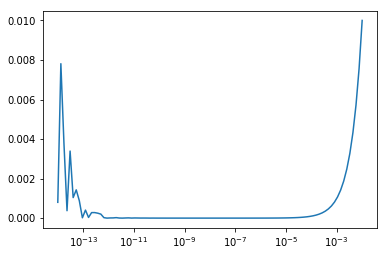

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*(x-1)

def derivative_f(x, delta):
    return (f(x+delta)-f(x))/delta

def derivative_f_analytical(x):
    return 2*x-1

def func_error(x, delta):
    return abs(derivative_f_analytical(point)-derivative_f(x, delta))

# a
# The two result are not equivalent because the numerical method is an
# approximation of the real result, which is obtained by the analytical method.
point = 1
der_1 = derivative_f(point, 10**(-2))
der_2 = derivative_f_analytical(1)
error = func_error(point, 10**(-2))
print("Numerical result:", der_1)
print("Analytical result:", der_2)
print("Error:", error)

# b
deltas = [10**(-2*x) for x in range(1,8)]
errors = [func_error(point, y) for y in deltas]
% matplotlib inline
x = np.logspace(-14, -2, 100)

# In the graph there is the behaviour of the error w.r.t delta
plt.xscale('log')
plt.plot(x,func_error(point,x));

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [93]:
import math 

# a
def numerical_integral(N):
    h = 2/N  
    sum = 0.0
    for i in range(N+1):
        sum = sum + h*f((i*h-1))
    return sum
    
def f(x):
    return (1-x**2)**(1/2)

res = numerical_integral(100)
print(res)
print("Error:", abs(res-math.pi/2))

SyntaxError: invalid syntax (<ipython-input-93-8bbb18e81367>, line 2)

In [103]:
%%time
import math 

# b
def numerical_integral(N):
    h = 2/N  
    sum = 0.0
    for i in range(N+1):
        sum = sum + h*f((i*h-1))
    return sum
    
def f(x):
    return (1-x**2)**(1/2)

Nsecond = 9*10**(5)
Nminute = 6*10**(7)
res = numerical_integral(Nminute)
print(res)
print("Error:", abs(res-math.pi/2))

# One second gives us a very high precision and it doesn't woth the effort to wait one minute for a little more precision

1.5707963267911924
Error: 3.704148099359372e-12
Wall time: 1min 5s
